In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,PowerTransformer
from feature_engine.encoding import WoEEncoder

from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
plt.rcParams['figure.figsize']=[15,8]

In [8]:
df=pd.read_csv('Clean.csv',index_col=0)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year
0,10000.000000,36 months,11.440000,329.480000,B,B4,Marketing,10+ years,RENT,117000.000000,Not Verified,Fully Paid,vacation,Vacation,26.240000,16,0,36369.000000,41.800000,25,w,INDIVIDUAL,0,0,2015,1,6,1990
1,8000.000000,36 months,11.990000,265.680000,B,B5,Credit analyst,4 years,MORTGAGE,65000.000000,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.050000,17,0,20131.000000,53.300000,27,f,INDIVIDUAL,3,0,2015,1,7,2004
2,15600.000000,36 months,10.490000,506.970000,B,B3,Statistician,< 1 year,RENT,43057.000000,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.790000,13,0,11987.000000,92.200000,26,f,INDIVIDUAL,0,0,2015,1,8,2007
3,7200.000000,36 months,6.490000,220.650000,A,A2,Client Advocate,6 years,RENT,54000.000000,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.600000,6,0,5472.000000,21.500000,13,f,INDIVIDUAL,0,0,2014,11,9,2006
4,24375.000000,60 months,17.270000,609.330000,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.000000,Verified,Charged Off,credit_card,Credit Card Refinance,33.950000,13,0,24584.000000,69.800000,43,f,INDIVIDUAL,1,0,2013,4,3,1999


<AxesSubplot:>

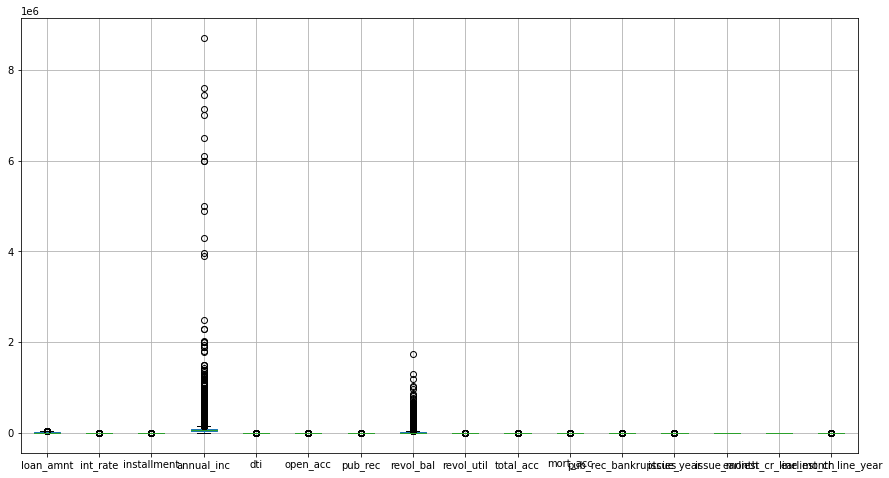

In [9]:
df.boxplot()

In [36]:
df['title'].nunique()

48817

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  object 
 5   sub_grade               396030 non-null  object 
 6   emp_title               396030 non-null  object 
 7   emp_length              396030 non-null  object 
 8   home_ownership          396030 non-null  object 
 9   annual_inc              396030 non-null  float64
 10  verification_status     396030 non-null  object 
 11  loan_status             396030 non-null  object 
 12  purpose                 396030 non-null  object 
 13  title                   396030 non-null  object 
 14  dti                 

<AxesSubplot:>

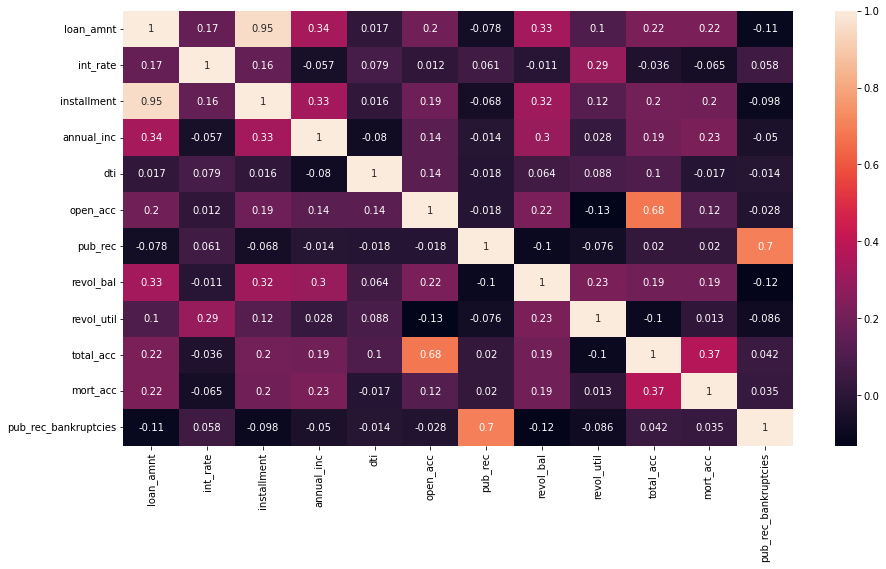

In [34]:
plt.rcParams['figure.figsize']=[15,8]
sns.heatmap(df_num.corr(),annot=True)

# Tree based models prepration

#### Data preparation

In [9]:
df1=df[~(df['dti']>300)]

In [11]:
df1.drop(columns=['issue_year', 'issue_month','earliest_cr_line_month', 'earliest_cr_line_year','sub_grade','initial_list_status','emp_title','title','initial_list_status'],inplace=True)

In [12]:
df1['loan_status']=df1['loan_status'].map({'Fully Paid':0,'Charged Off':1})

In [13]:
df1['loan_status'].unique()

array([0, 1], dtype=int64)

In [14]:
# bining variables for shake of simplicity
df1['home_ownership']=df1['home_ownership'].replace(['OTHER', 'NONE', 'ANY'],'OTHERS')

In [15]:
X=df1.drop(columns='loan_status')
y=df1.loan_status

#splitting test train sets with 30:70 ratio respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (277218, 19)
y_train (277218,)
X_test (118809, 19)
y_test (118809,)


In [12]:
for i in df1.describe(include=object).columns:
    print(i)
    a=df1[i].value_counts()
    b=df1[i].value_counts()/len(df1)*100
    print(pd.concat([a,b],axis=1,keys=['Values','Percentage']))
    print('-----------------------------')

term
            Values  Percentage
 36 months  302003   76.258184
 60 months   94024   23.741816
-----------------------------
grade
   Values  Percentage
B  116017   29.295225
C  105986   26.762317
A   64187   16.207733
D   63523   16.040068
E   31488    7.950973
F   11772    2.972525
G    3054    0.771160
-----------------------------
emp_length
           Values  Percentage
10+ years  144340   36.447010
2 years     35827    9.046605
< 1 year    31725    8.010817
3 years     31665    7.995667
5 years     26495    6.690200
1 year      25881    6.535160
4 years     23952    6.048072
6 years     20841    5.262520
7 years     20819    5.256965
8 years     19168    4.840074
9 years     15314    3.866908
-----------------------------
home_ownership
          Values  Percentage
MORTGAGE  198345   50.083706
RENT      159790   40.348259
OWN        37746    9.531168
OTHERS       146    0.036866
-----------------------------
verification_status
                 Values  Percentage
Verified     

#### encoding of categories

In [16]:
#encoding categorical variables

le=LabelEncoder()
Oe=OrdinalEncoder()
Ohe=OneHotEncoder()
clf=WoEEncoder()


# train set

X_train['home_ownership']=clf.fit_transform(X_train[['home_ownership']],y_train)
X_train['purpose']=clf.fit_transform(X_train[['purpose']],y_train)
X_train['grade']=Oe.fit_transform(X_train[['grade']])
X_train['emp_length']=Oe.fit_transform(X_train[['emp_length']])
X_train['term']=Ohe.fit_transform(X_train[['term']]).toarray()
X_train['verification_status']=Ohe.fit_transform(X_train[['verification_status']]).toarray()
X_train['application_type']=Ohe.fit_transform(X_train[['application_type']]).toarray()

# test set

X_test['home_ownership']=clf.fit_transform(X_test[['home_ownership']],y_test)
X_test['purpose']=clf.fit_transform(X_test[['purpose']],y_test)
X_test['grade']=Oe.fit_transform(X_test[['grade']])
X_test['emp_length']=Oe.fit_transform(X_test[['emp_length']])
X_test['term']=Ohe.fit_transform(X_test[['term']]).toarray()
X_test['verification_status']=Ohe.fit_transform(X_test[['verification_status']]).toarray()
X_test['application_type']=Ohe.fit_transform(X_test[['application_type']]).toarray()


#### creating genaralized functions

In [17]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [18]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [19]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    
    cm = confusion_matrix(y_test, y_pred)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

  
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [20]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    

    y_pred_prob = model.predict_proba(test_data)[:,1]
    
   
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

   
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

## decision tree

In [21]:
dt_model = DecisionTreeClassifier()

# fit the model using fit() on train data
decision_tree = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
train_report = get_train_report(decision_tree)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(decision_tree)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    222746
           1       1.00      1.00      1.00     54472

    accuracy                           1.00    277218
   macro avg       1.00      1.00      1.00    277218
weighted avg       1.00      1.00      1.00    277218

Test data:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81     95609
           1       0.27      0.29      0.28     23200

    accuracy                           0.71    118809
   macro avg       0.55      0.55      0.55    118809
weighted avg       0.72      0.71      0.71    118809



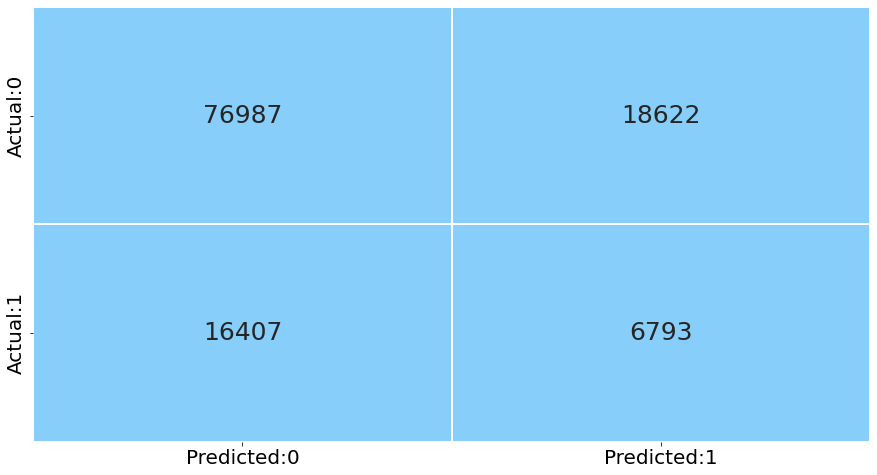

In [22]:
plot_confusion_matrix(decision_tree,X_test)

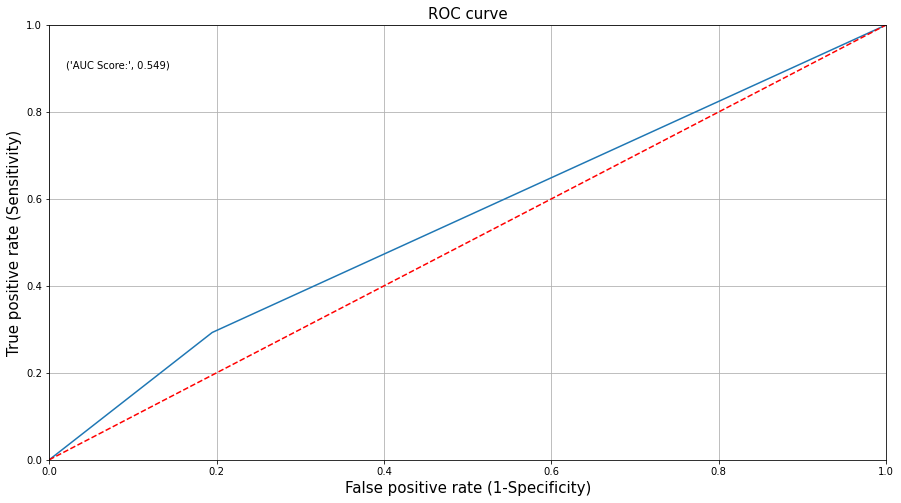

In [23]:
plot_roc(decision_tree,X_test)

In [27]:
# since directly fitting the decision tree will result in overfitting so we input certatn hyperparameter
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree1 = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
train_report = get_train_report(decision_tree1)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(decision_tree1)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89    222746
           1       0.00      0.00      0.00     54472

    accuracy                           0.80    277218
   macro avg       0.40      0.50      0.45    277218
weighted avg       0.65      0.80      0.72    277218

Test data:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     95609
           1       0.00      0.00      0.00     23200

    accuracy                           0.80    118809
   macro avg       0.40      0.50      0.45    118809
weighted avg       0.65      0.80      0.72    118809



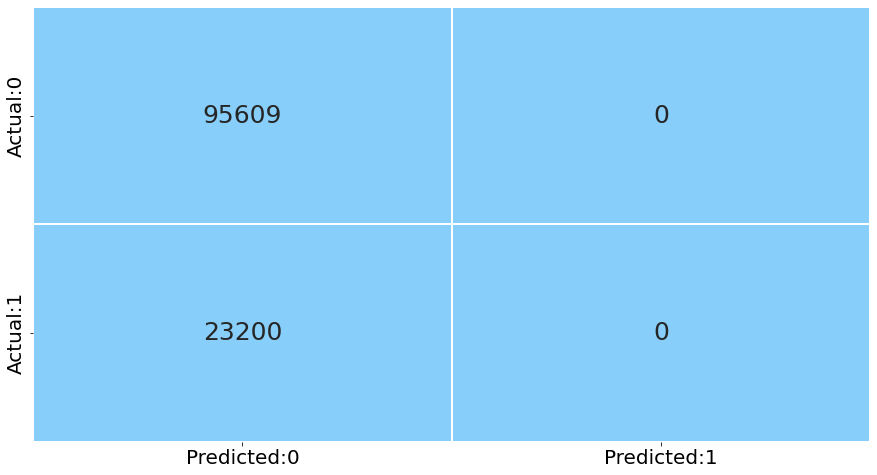

In [28]:
plot_confusion_matrix(decision_tree1,X_test)

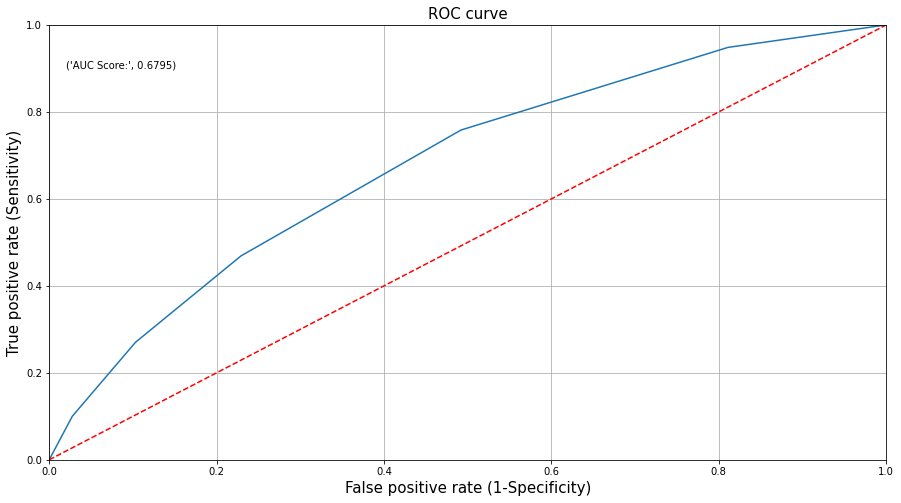

In [102]:
plot_roc(decision_tree1,X_test)

### Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [92]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(5, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(4,10),
                     'max_leaf_nodes': range(1, 8)}]
 
# instantiate the 'DecisionTreeClassifier' 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)


# cv: number of folds in k-fold i.e. here cv = 3 (cv is low because of time constrain)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 3)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_split': 4} 



C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 4200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 350, in fit
    check_scalar(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 

#### building a model using the best parameters

In [94]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
decision_tree2 = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
train_report = get_train_report(decision_tree2)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(decision_tree2)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89    222746
           1       0.00      0.00      0.00     54472

    accuracy                           0.80    277218
   macro avg       0.40      0.50      0.45    277218
weighted avg       0.65      0.80      0.72    277218

Test data:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     95609
           1       0.00      0.00      0.00     23200

    accuracy                           0.80    118809
   macro avg       0.40      0.50      0.45    118809
weighted avg       0.65      0.80      0.72    118809



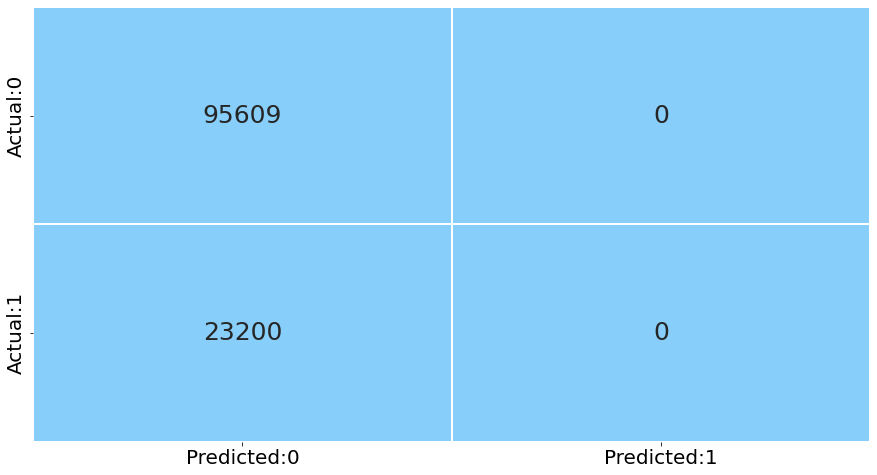

In [105]:
plot_confusion_matrix(decision_tree2,X_test)

## Random forest

In [107]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

# compute the performance measures on train data
train_report = get_train_report(rf_model)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(rf_model)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    222746
           1       1.00      0.89      0.94     54472

    accuracy                           0.98    277218
   macro avg       0.99      0.95      0.97    277218
weighted avg       0.98      0.98      0.98    277218

Test data:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88     95609
           1       0.42      0.10      0.17     23200

    accuracy                           0.80    118809
   macro avg       0.62      0.53      0.53    118809
weighted avg       0.74      0.80      0.74    118809



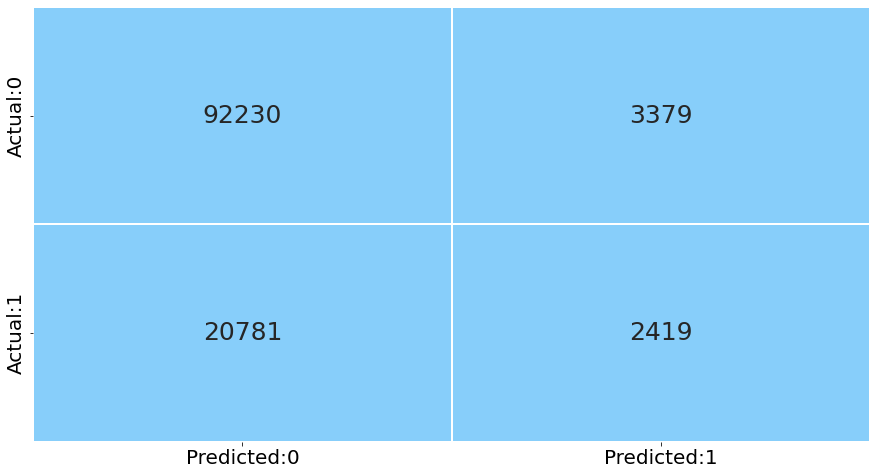

In [108]:
plot_confusion_matrix(rf_model,X_test)

#### hypertune parameters

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [ 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8],
                     'min_samples_leaf': [1, 5, 9]}]
 
# instantiate the 'RandomForestClassifier' 
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 3,scoring='roc_auc')

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [ ]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model1 = rf_model.fit(X_train, y_train)

# compute the performance measures on train data
train_report = get_train_report(rf_model1)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(rf_model1)

# print the performance measures
print('Test data:\n', test_report)

In [ ]:
plot_confusion_matrix(rf_model,X_test)

In [ ]:
plot_roc(rf_model1,X_test)

Wasn't able to compute because of time consstrain

# boosting models

## Gradian boost

In [26]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
gb_grid_model = GradientBoostingClassifier(learning_rate =0.1,
                               max_depth = 8)

# use fit() to fit the model on the train set
gb_model = gb_grid_model.fit(X_train, y_train)


# compute the performance measures on train data
train_report = get_train_report(gb_model)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(gb_model)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90    222746
           1       0.78      0.14      0.24     54472

    accuracy                           0.82    277218
   macro avg       0.80      0.57      0.57    277218
weighted avg       0.82      0.82      0.77    277218

Test data:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     95609
           1       0.54      0.09      0.15     23200

    accuracy                           0.81    118809
   macro avg       0.68      0.53      0.52    118809
weighted avg       0.76      0.81      0.75    118809



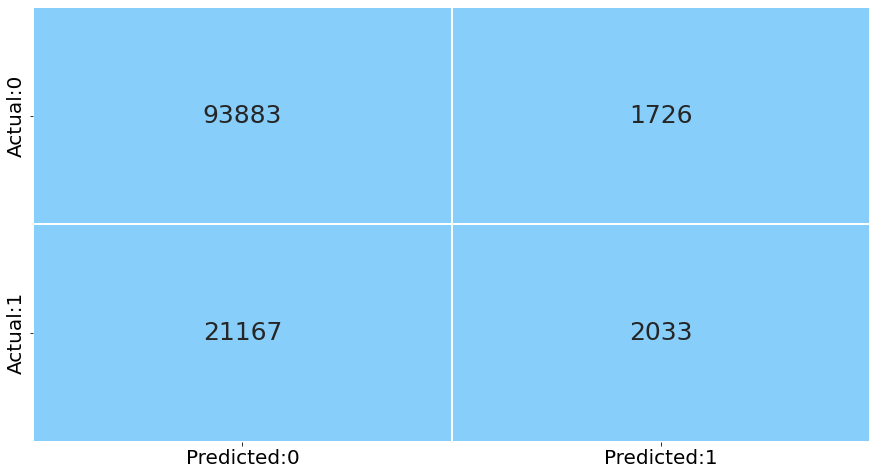

In [36]:
plot_confusion_matrix(gb_model,X_test)

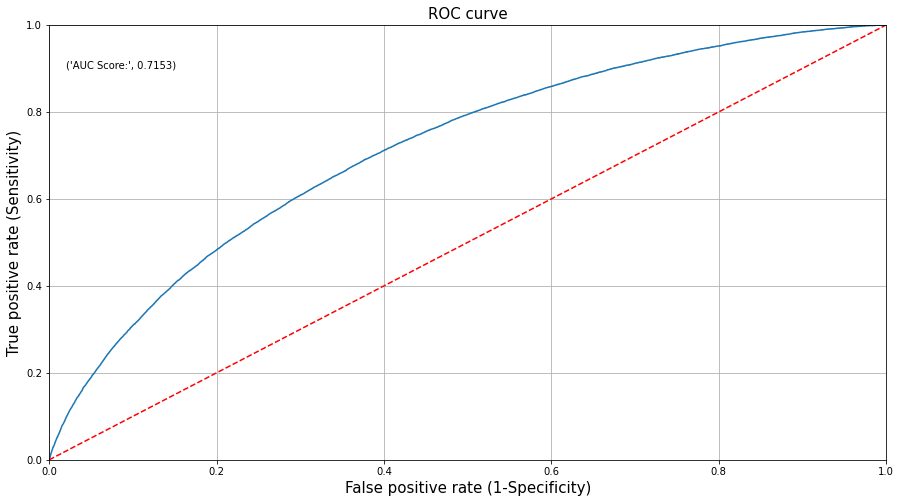

In [37]:
plot_roc(gb_model,X_test)

## XGBoost

In [27]:
xgb_model = XGBClassifier(learning_rate=0.1,max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

# compute the performance measures on train data
train_report = get_train_report(xgb_model)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(xgb_model)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90    222746
           1       0.84      0.17      0.28     54472

    accuracy                           0.83    277218
   macro avg       0.83      0.58      0.59    277218
weighted avg       0.83      0.83      0.78    277218

Test data:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     95609
           1       0.54      0.09      0.15     23200

    accuracy                           0.81    118809
   macro avg       0.68      0.54      0.52    118809
weighted avg       0.76      0.81      0.75    118809



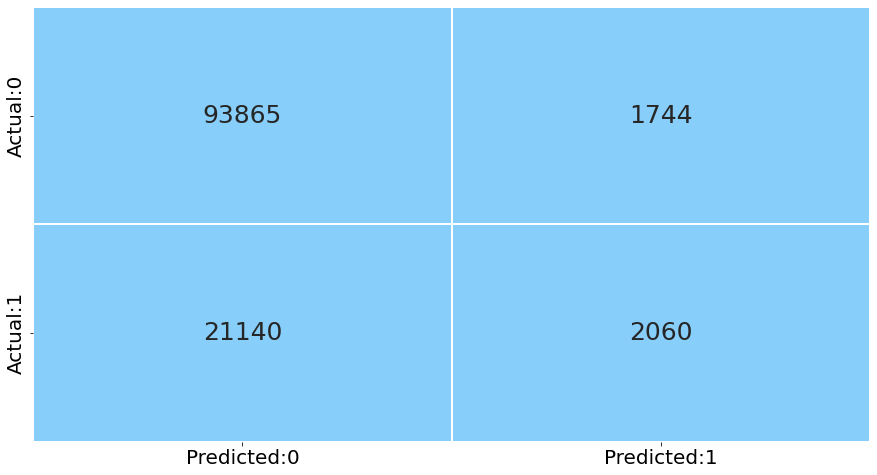

In [28]:
plot_confusion_matrix(xgb_model,X_test)

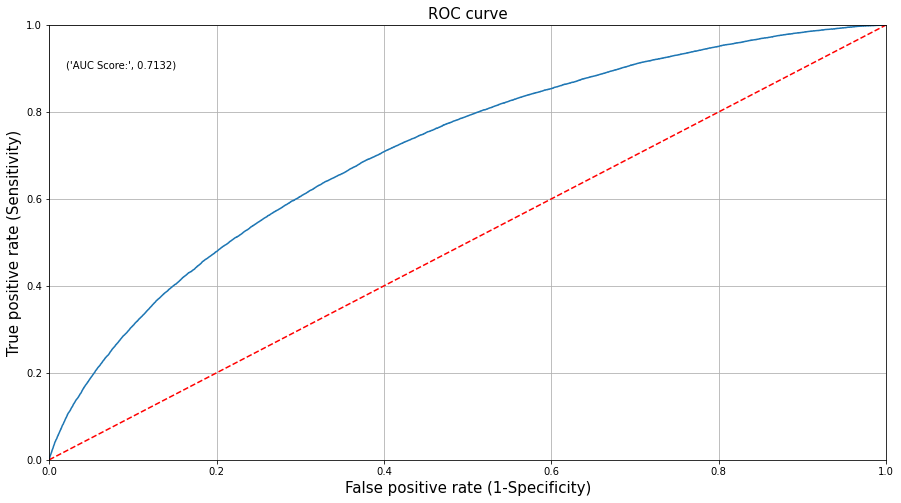

In [29]:
plot_roc(xgb_model,X_test)

## Models After oversampling

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
ros=RandomOverSampler(random_state=10)
X_train_resampled,y_train_resampled=ros.fit_resample(X_train,y_train)

### Decesion tree resampled

In [28]:
dt_model = DecisionTreeClassifier()

# fit the model using fit() on train data
decision_tree_resampled = dt_model.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(decision_tree_resampled)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(decision_tree_resampled)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    222746
           1       1.00      1.00      1.00     54472

    accuracy                           1.00    277218
   macro avg       1.00      1.00      1.00    277218
weighted avg       1.00      1.00      1.00    277218

Test data:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     95609
           1       0.27      0.27      0.27     23200

    accuracy                           0.71    118809
   macro avg       0.54      0.55      0.55    118809
weighted avg       0.71      0.71      0.71    118809



In [40]:
# since directly fitting the decision tree will result in overfitting so we input certatn hyperparameter
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 5,
                                  max_features='sqrt',
                                  min_samples_split = 4,
                                  max_leaf_nodes = 2,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree_resampled1 = dt_model.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(decision_tree_resampled1)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(decision_tree_resampled1)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.85      0.34      0.48    222746
           1       0.22      0.77      0.34     54472

    accuracy                           0.42    277218
   macro avg       0.54      0.55      0.41    277218
weighted avg       0.73      0.42      0.45    277218

Test data:
               precision    recall  f1-score   support

           0       0.85      0.33      0.48     95609
           1       0.22      0.76      0.34     23200

    accuracy                           0.42    118809
   macro avg       0.53      0.55      0.41    118809
weighted avg       0.73      0.42      0.45    118809



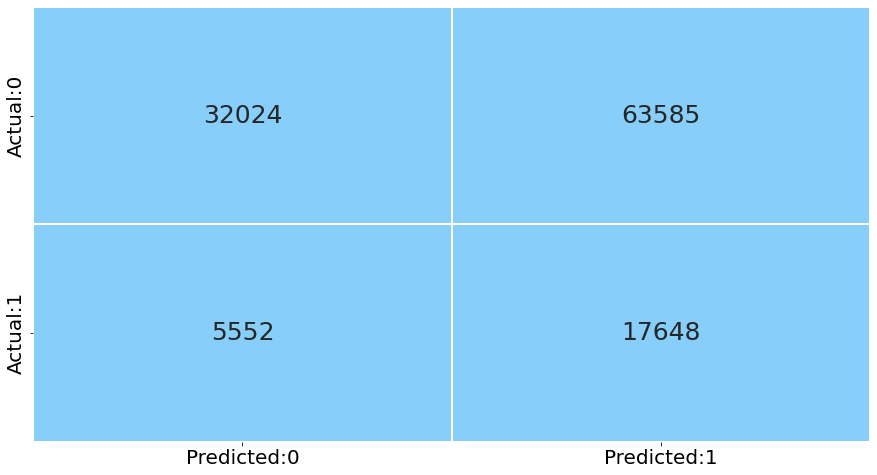

In [41]:
plot_confusion_matrix(decision_tree_resampled1,X_test)

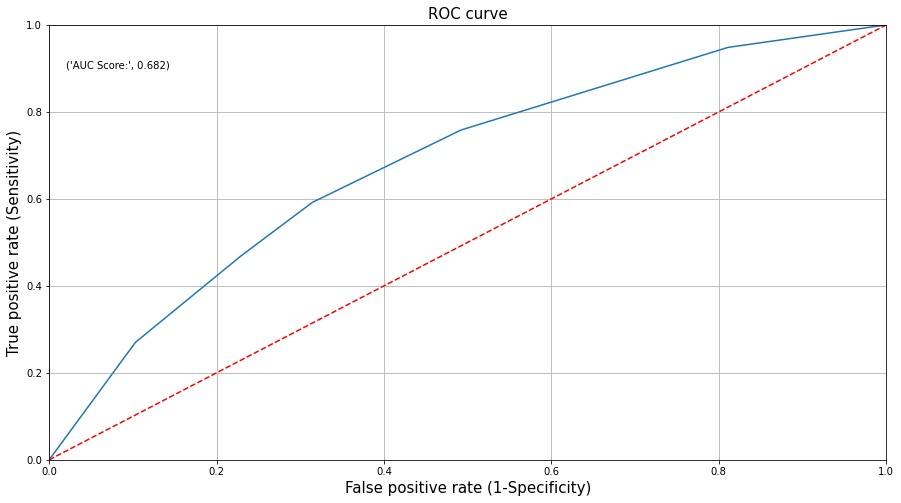

In [32]:
plot_roc(decision_tree_resampled1,X_test)

### Decision tree resampled after parameter tunning

In [43]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(5, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(4,10),
                     'max_leaf_nodes': range(1, 8)}]
 
# instantiate the 'DecisionTreeClassifier' 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)


# cv: number of folds in k-fold i.e. here cv = 3 (cv is low because of time constrain)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 3,scoring='accuracy')

# fit the model on X_train and y_train using fit()
tree_grid_model_resampled = tree_grid.fit(X_train_resampled, y_train_resampled)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model_resampled.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_split': 4} 



In [44]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model_resampled.best_params_.get('criterion'),
                                  max_depth = tree_grid_model_resampled.best_params_.get('max_depth'),
                                  max_features = tree_grid_model_resampled.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model_resampled.best_params_.get('max_leaf_nodes'),
                                  min_samples_split = tree_grid_model_resampled.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
decision_tree_resampled2 = dt_model.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(decision_tree_resampled2)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(decision_tree_resampled2)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81    222746
           1       0.31      0.43      0.36     54472

    accuracy                           0.70    277218
   macro avg       0.58      0.60      0.58    277218
weighted avg       0.74      0.70      0.72    277218

Test data:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81     95609
           1       0.31      0.43      0.36     23200

    accuracy                           0.70    118809
   macro avg       0.58      0.60      0.58    118809
weighted avg       0.74      0.70      0.72    118809



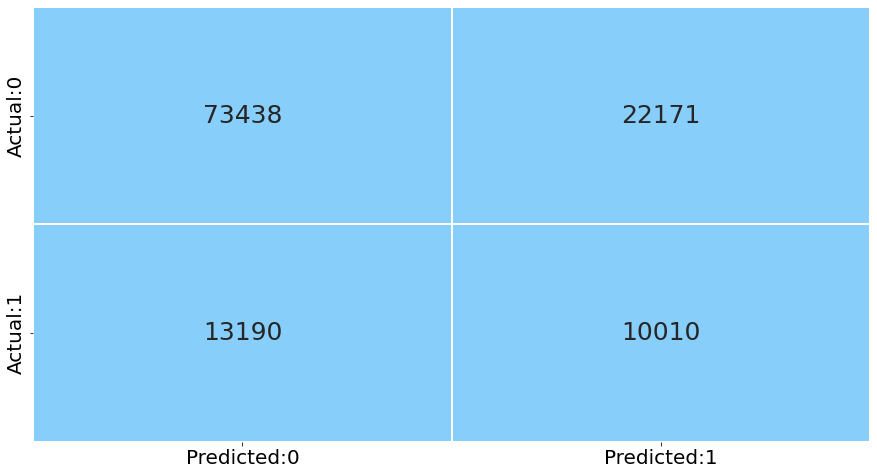

In [45]:
plot_confusion_matrix(decision_tree_resampled2,X_test)

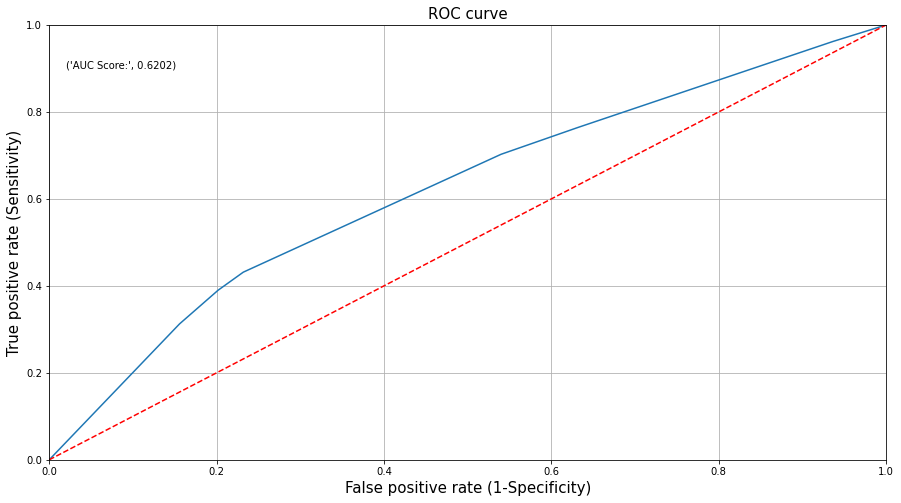

In [46]:
plot_roc(decision_tree_resampled2,X_test)

## Random forest resampled

In [36]:
rf_classification = RandomForestClassifier(n_estimators = 40,max_depth=20,max_leaf_nodes=15,random_state = 10)

# use fit() to fit the model on the train set
rf_model_resampled = rf_classification.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(rf_model_resampled)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(rf_model_resampled)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.89      0.60      0.72    222746
           1       0.30      0.70      0.42     54472

    accuracy                           0.62    277218
   macro avg       0.59      0.65      0.57    277218
weighted avg       0.77      0.62      0.66    277218

Test data:
               precision    recall  f1-score   support

           0       0.89      0.60      0.72     95609
           1       0.29      0.69      0.41     23200

    accuracy                           0.62    118809
   macro avg       0.59      0.64      0.56    118809
weighted avg       0.77      0.62      0.66    118809



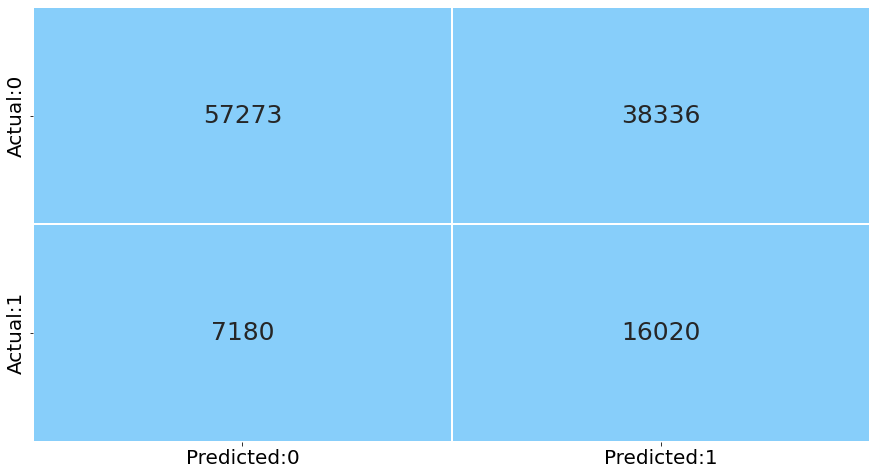

In [37]:
plot_confusion_matrix(rf_model_resampled,X_test)

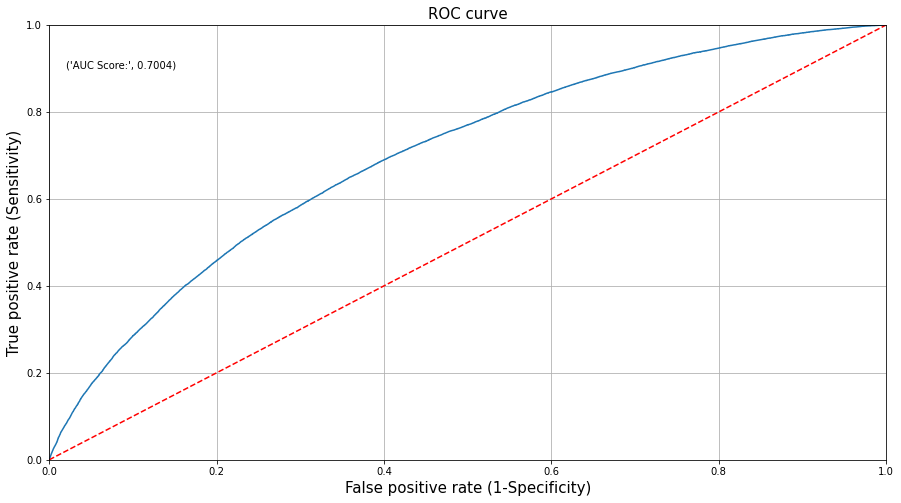

In [38]:
plot_roc(rf_model_resampled,X_test)

### Gradient boosting resampling

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gb_grid_model = GradientBoostingClassifier(learning_rate =0.1,
                               max_depth = 12)

# use fit() to fit the model on the train set
gb_model_resampled = gb_grid_model.fit(X_train_resampled, y_train_resampled)


# compute the performance measures on train data
train_report = get_train_report(gb_model_resampled)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(gb_model_resampled)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90    222746
           1       0.59      0.87      0.70     54472

    accuracy                           0.85    277218
   macro avg       0.77      0.86      0.80    277218
weighted avg       0.89      0.85      0.86    277218

Test data:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81     95609
           1       0.35      0.50      0.41     23200

    accuracy                           0.72    118809
   macro avg       0.60      0.63      0.61    118809
weighted avg       0.76      0.72      0.74    118809



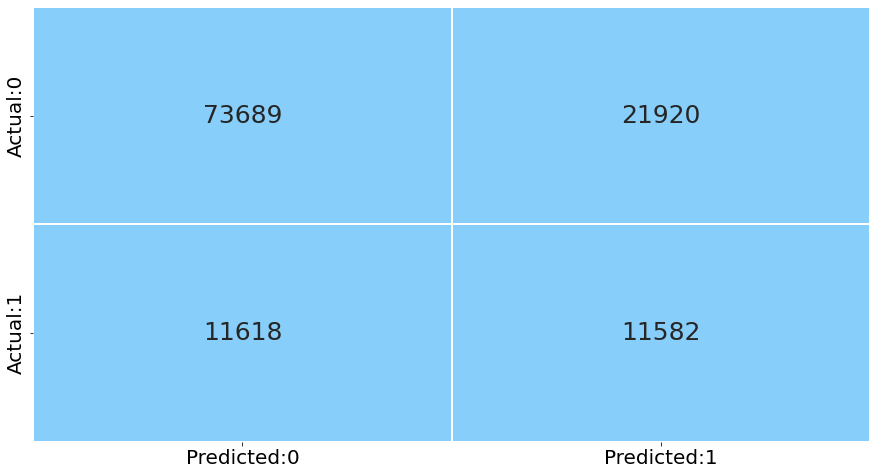

In [53]:
plot_confusion_matrix(gb_model_resampled,X_test)

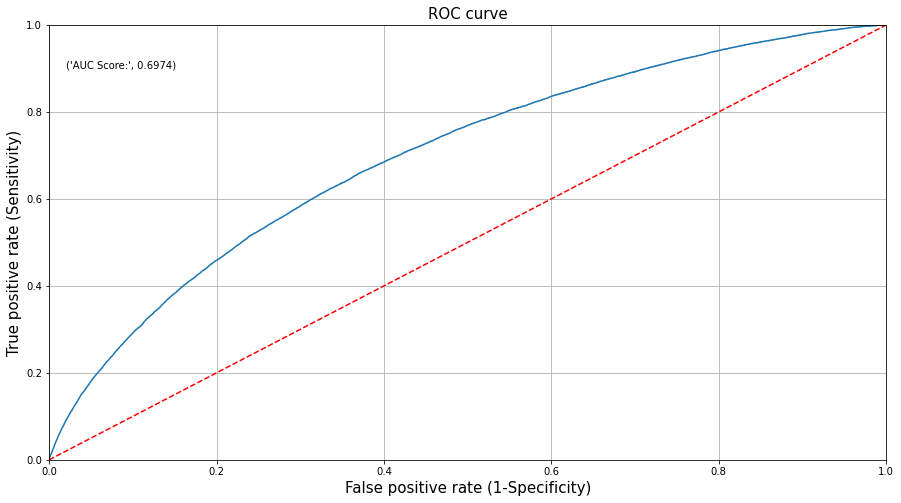

In [54]:
plot_roc(gb_model_resampled,X_test)

In [32]:
gb_grid_model = GradientBoostingClassifier(learning_rate =0.2,
                               max_depth = 15)

# use fit() to fit the model on the train set
gb_model_resampled = gb_grid_model.fit(X_train_resampled, y_train_resampled)


# compute the performance measures on train data
train_report = get_train_report(gb_model_resampled)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(gb_model_resampled)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    222746
           1       0.98      0.99      0.99     54472

    accuracy                           1.00    277218
   macro avg       0.99      0.99      0.99    277218
weighted avg       1.00      1.00      1.00    277218

Test data:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     95609
           1       0.38      0.29      0.33     23200

    accuracy                           0.77    118809
   macro avg       0.61      0.59      0.59    118809
weighted avg       0.75      0.77      0.76    118809



In [34]:
xgb_model_resampled = XGBClassifier(learning_rate=0.1,max_depth = 12, gamma = 1)

# fit the model using fit() on train data
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(xgb_model_resampled)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(xgb_model_resampled)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89    222746
           1       0.54      0.84      0.66     54472

    accuracy                           0.83    277218
   macro avg       0.75      0.83      0.77    277218
weighted avg       0.87      0.83      0.84    277218

Test data:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81     95609
           1       0.34      0.52      0.41     23200

    accuracy                           0.71    118809
   macro avg       0.60      0.64      0.61    118809
weighted avg       0.76      0.71      0.73    118809



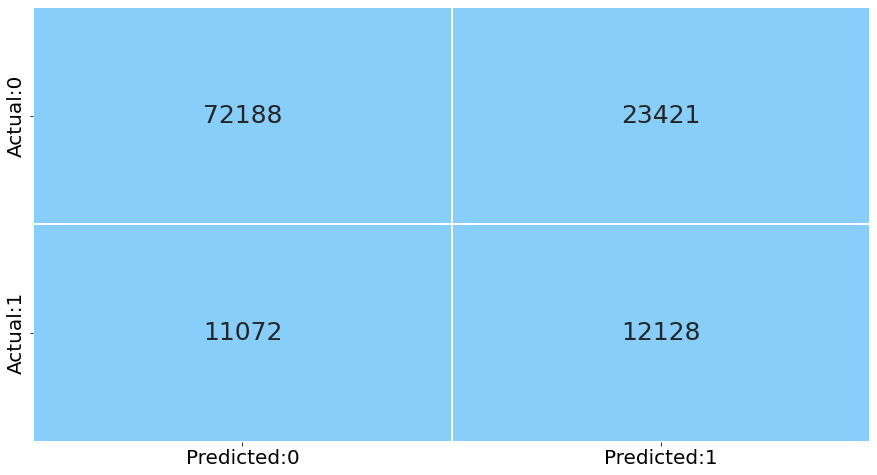

In [35]:
plot_confusion_matrix(xgb_model_resampled,X_test)

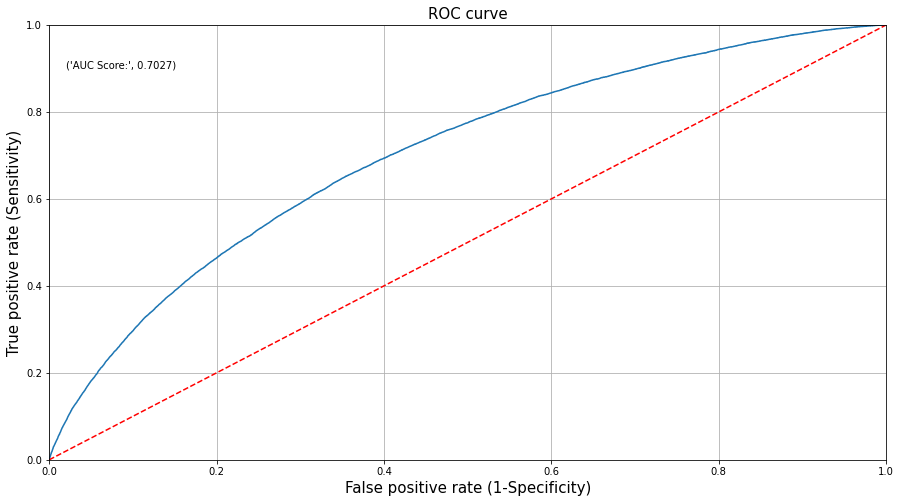

In [36]:
plot_roc(xgb_model_resampled,X_test)

In [37]:
from sklearn.metrics import cohen_kappa_score

In [40]:
cohen_kappa_score(y_test,xgb_model_resampled.predict(X_test))

0.1881397940156645

In [39]:
xgb_model_resampled = XGBClassifier(learning_rate=0.2,max_depth = 20, gamma = 1)

# fit the model using fit() on train data
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(xgb_model_resampled)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(xgb_model_resampled)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    222746
           1       1.00      1.00      1.00     54472

    accuracy                           1.00    277218
   macro avg       1.00      1.00      1.00    277218
weighted avg       1.00      1.00      1.00    277218

Test data:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87     95609
           1       0.40      0.26      0.31     23200

    accuracy                           0.78    118809
   macro avg       0.62      0.58      0.59    118809
weighted avg       0.75      0.78      0.76    118809



In [45]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

In [46]:
train_report = get_train_report(stack_model)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(stack_model)

# print the performance  
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87    222746
           1       0.43      0.30      0.35     54472

    accuracy                           0.78    277218
   macro avg       0.64      0.60      0.61    277218
weighted avg       0.76      0.78      0.77    277218

Test data:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87     95609
           1       0.41      0.28      0.33     23200

    accuracy                           0.78    118809
   macro avg       0.62      0.59      0.60    118809
weighted avg       0.75      0.78      0.76    118809



In [47]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

# fit the model using fit() on train data
sv_model_resampled=sv.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(sv_model_resampled)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(sv_model_resampled)

# print the performance measures
print('Test data:\n', test_report)

In [ ]:
from sklearn.preprocessing import P